<a href="https://colab.research.google.com/github/VivekMuraleedharanGit/KC_house-price-prediction-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/Data Science /Data Science notebooks/KC_houseprice/wk3_kc_house_train_data.csv')
test= pd.read_csv('/content/drive/MyDrive/Data Science /Data Science notebooks/KC_houseprice/kc_house_test_data.csv')
valid= pd.read_csv('/content/drive/MyDrive/Data Science /Data Science notebooks/KC_houseprice/wk3_kc_house_valid_data.csv')



In [ ]:
train.shape

(9761, 21)

In [ ]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


1. Avg price of house in the KC state is $5400000
2.Max price of the house sold is 77000000
3.avg no.of bedrooms is 3
4.avg no.of bathrooms are 2
5.there are houses with no bedrooms and no bathrooms - which are mostly anomalies




Checking for null values

In [ ]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

no null values are present in the dataset

Will check for the data types in the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

All the columns are in requried format

# Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f969eb9bc90>,
      dtype=object)

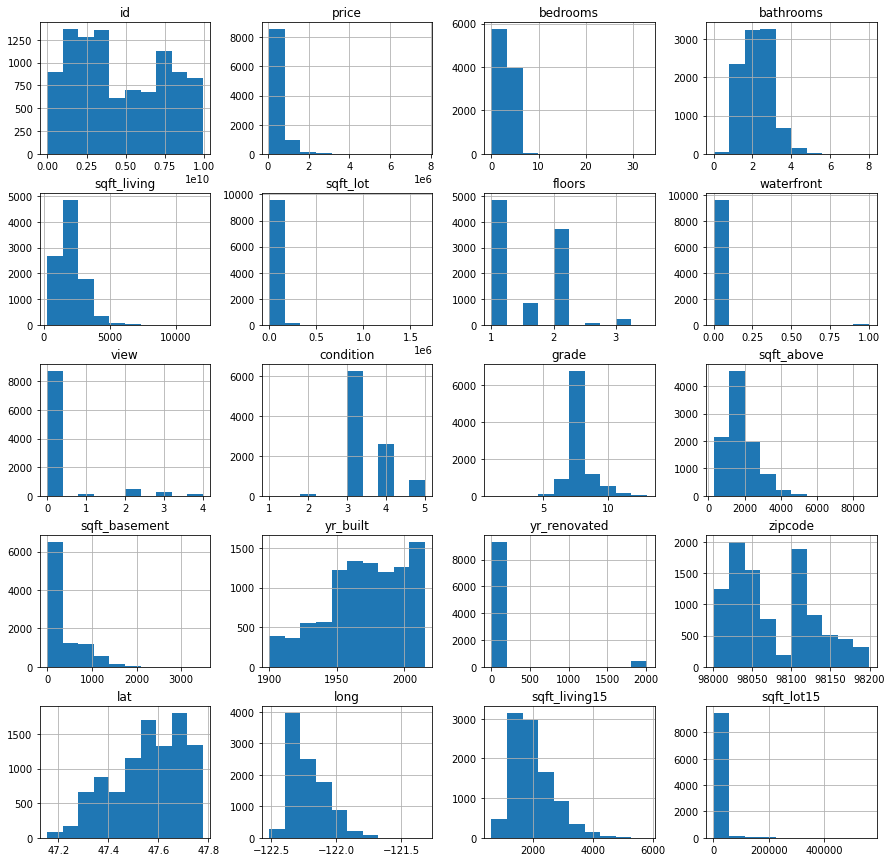

In [ ]:
train.hist(figsize=(15,15))

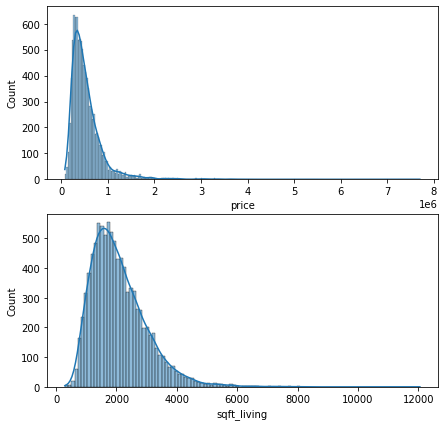

In [ ]:
#price ,sqft_living dsitribution

import seaborn as sns
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(7,7))
sns.histplot(train.price,kde=True,ax=ax[0])
sns.histplot(train.sqft_living,kde=True,ax=ax[1])

data is positively skewed so we try to make it normal by taking log tranformation of them


In [ ]:
train.price = np.log(train.price)
train.sqft_living = np.log(train.sqft_living)

sqft_living is sum of sqft_above and sqft_basement so we will ignore these two variables

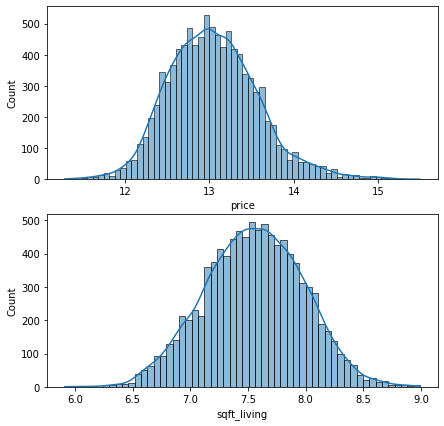

In [ ]:
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(7,7))
sns.histplot(train.price,kde=True,ax=ax[0])
sns.histplot(train.sqft_living,kde=True,ax=ax[1])

In [ ]:
#train=train.drop(['sqft_above','sqft_basement'],axis=1)

In [ ]:
train.bedrooms.value_counts()

3     4417
4     3094
2     1255
5      755
6      116
1       88
7       17
8        7
0        6
9        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
train.bathrooms.value_counts(ascending=False)

2.50    2409
1.00    1741
1.75    1431
2.25     937
2.00     871
1.50     599
2.75     525
3.50     339
3.00     335
3.25     274
3.75      72
4.00      61
4.50      47
0.75      37
4.25      33
5.00      10
4.75       9
5.50       6
5.25       5
1.25       5
0.00       4
5.75       3
6.00       2
6.50       2
7.75       1
6.25       1
7.50       1
8.00       1
Name: bathrooms, dtype: int64

# Bivariate Analysis

In [ ]:
train1=train[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]

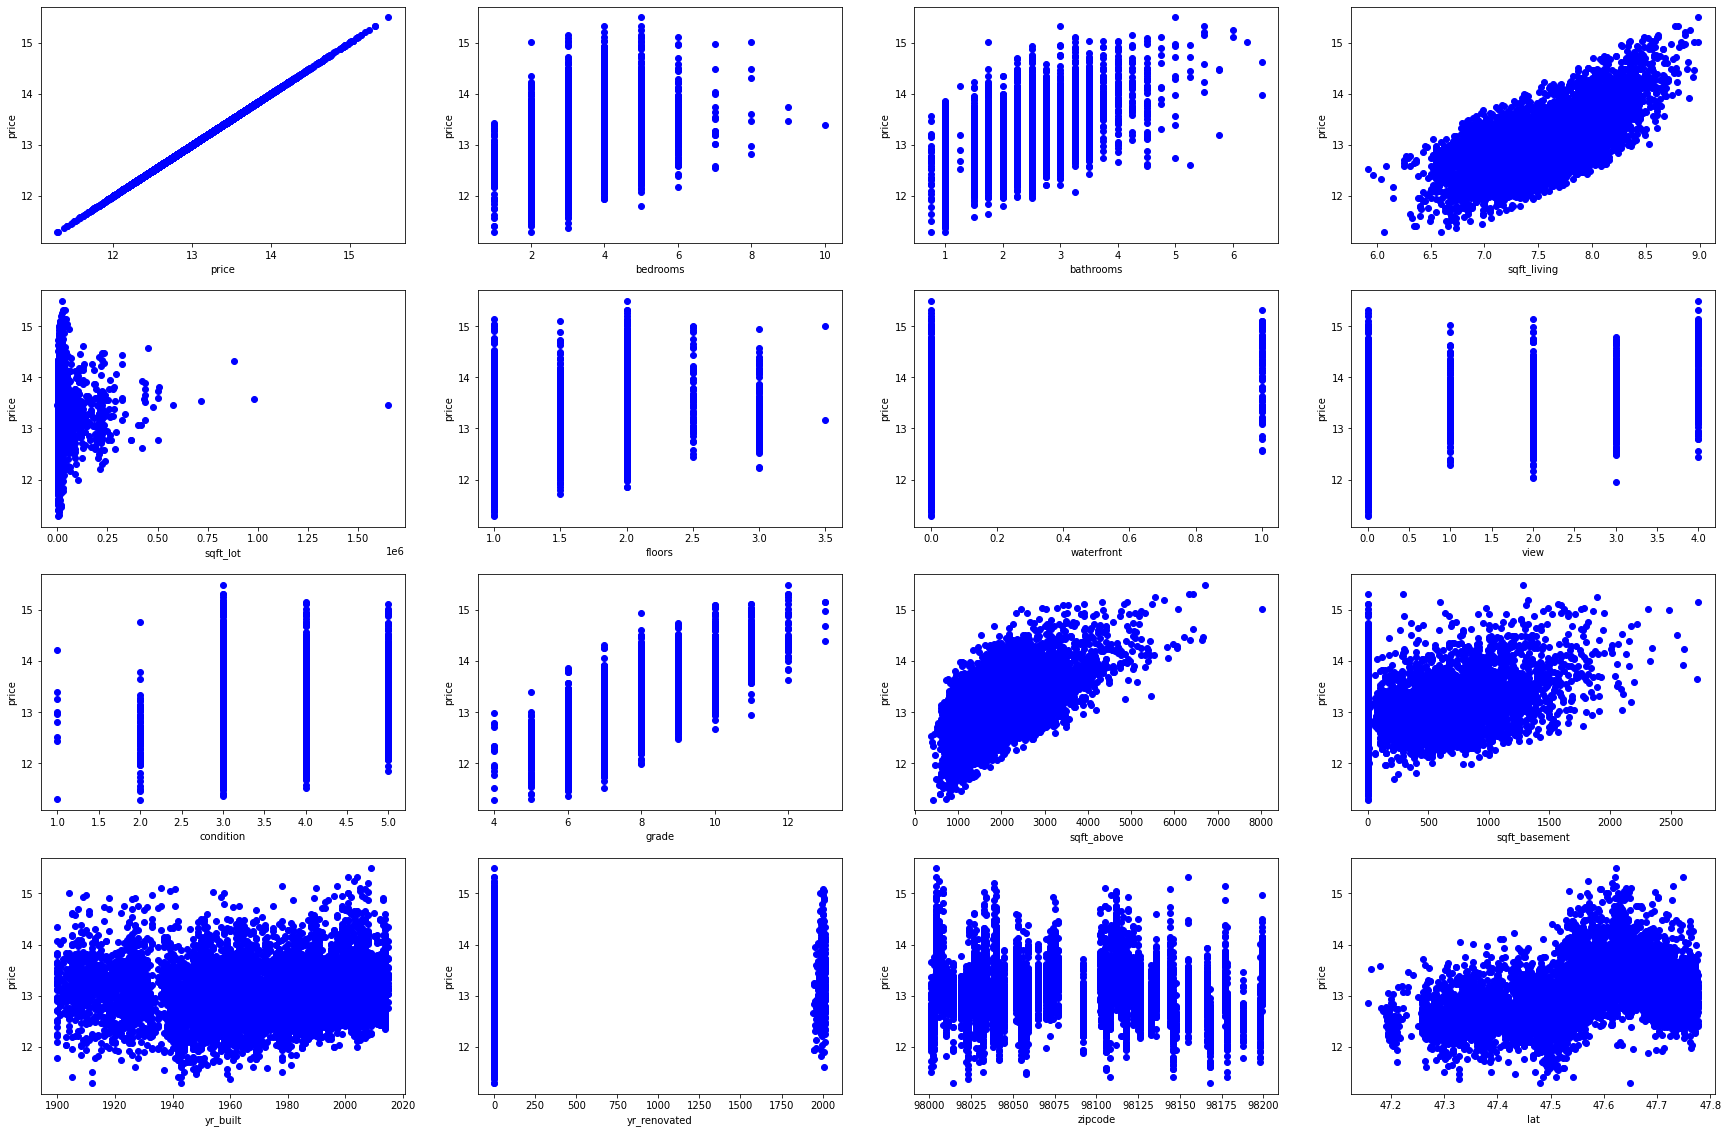

In [ ]:
ncols = 4
nrows = int(len(train1.columns) / (1.0*ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))

counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        if counter < len(train.columns):

            ax.scatter(train[train1.columns[counter]],train['price'], color='blue')
            ax.set_ylabel('price')
            ax.set_xlabel(train1.columns[counter])
        counter += 1

plt.show()

In [ ]:
#correlation plot

from pandas.plotting import scatter_matrix
scatter_matrix(train, alpha=0.2, figsize=(20,20), diagonal='kde')

In [ ]:
corrMatrix = train.corr()
corrMatrix

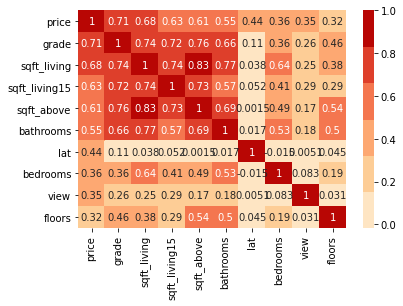

In [ ]:
cols = corrMatrix.nlargest(10, 'price')['price'].index
cm = train[cols].corr()
hm = sns.heatmap(cm, cbar=True, annot=True,cmap=sns.color_palette("OrRd"), yticklabels=cols.values, xticklabels=cols.values)

Price has high correlation with grade,sqft_living,sqft_living15,sqftabove,bathrooms

#Anomalies treatment
1. Remove the data contains 0 bedrooms and 0 bathrooms
2. remove the data contain more than 10 bedrooms and 7 bathrooms

In [ ]:
train= train.drop(train[train['bedrooms']>10].index)
train= train.drop(train[train['bedrooms']==0].index)
train = train.drop(train[train['bathrooms']>7].index)
train= train.drop(train[train['bathrooms']==0].index)


Zipcode having influence in the price of house since we do onehot encoding for zipcode

In [ ]:
dummies= pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies],axis=1)

In [ ]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,...,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2487200875,20141209T000000,13.311329,4,3.00,7.580700,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7237550310,20140512T000000,14.018451,4,4.50,8.597851,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9212900260,20140527T000000,13.056224,2,1.00,7.056175,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,114101516,20140528T000000,12.644328,3,1.00,7.265430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6054650070,20141007T000000,12.899220,3,1.75,7.222566,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X= train.drop(['price','zipcode'],axis=1)

In [ ]:
X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,...,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,2487200875,20141209T000000,4,3.00,7.580700,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,7237550310,20140512T000000,4,4.50,8.597851,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9212900260,20140527T000000,2,1.00,7.056175,6000,1.0,0,0,4,7,860,300,1942,0,47.6900,-122.292,1330,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,114101516,20140528T000000,3,1.00,7.265430,19901,1.5,0,0,4,7,1430,0,1927,0,47.7558,-122.229,1780,12697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6054650070,20141007T000000,3,1.75,7.222566,9680,1.0,0,0,4,7,1370,0,1977,0,47.6127,-122.045,1370,10208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Feature selection in the initial model
set of features are selected based on the univariate and multivariate analysis

In [ ]:
features = [ 'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',          
                'sqft_living15',    'sqft_lot15',           98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

In [ ]:
x_train= X[features]

In [ ]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,...,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,4,3.00,7.580700,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4,4.50,8.597851,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,7.056175,6000,1.0,0,0,4,7,860,300,1942,0,1330,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1.00,7.265430,19901,1.5,0,0,4,7,1430,0,1927,0,1780,12697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1.75,7.222566,9680,1.0,0,0,4,7,1370,0,1977,0,1370,10208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,3,2.00,7.306531,1126,3.0,0,0,3,8,1490,0,2014,0,1400,1230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9757,4,2.50,7.832014,6023,2.0,0,0,3,9,2520,0,2014,0,2520,6023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9758,4,3.50,8.163371,7200,2.0,0,0,3,9,2600,910,2009,0,2050,6200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9759,2,0.75,6.927558,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['price']

In [ ]:
y_train

0       13.311329
1       14.018451
2       13.056224
3       12.644328
4       12.899220
          ...    
9756    12.969212
9757    13.322337
9758    13.822983
9759    12.904459
9760    12.691580
Name: price, Length: 9750, dtype: float64

In [ ]:
x_train.shape,y_train.shape

((9750, 85), (9750,))

# Model building
Using Linear regression

In [ ]:
from sklearn.linear_model import  LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_square1=reg.score(x_train,y_train)

In [ ]:
y_pred= reg.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [ ]:
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred))),'.3f'))

rtrmlr = float(format(reg.score(x_train,y_train),'.3f'))

r2_train = float(format(r2_score(y_train, y_pred),'.3f'))
print(rmsemlr_train, rtrmlr, r2_train)

126778.69 0.887 0.887


# Fitting Model on trianing data

In [ ]:
#reading 
train= pd.read_csv('/content/drive/MyDrive/Data Science /Data Science notebooks/KC_houseprice/wk3_kc_house_train_data.csv')

#log transform of price and sqft_living
train.price = np.log(train.price)
train.sqft_living = np.log(train.sqft_living)

#anomalies removal
train= train.drop(train[train['bedrooms']>10].index)
train= train.drop(train[train['bedrooms']==0].index)
train = train.drop(train[train['bathrooms']>7].index)
train= train.drop(train[train['bathrooms']==0].index)

#dummies creation
dummies= pd.get_dummies(train.zipcode)
train=pd.concat([train,dummies],axis=1)


#feature selection 
features = [ 'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',          
                'sqft_living15',    'sqft_lot15',           98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)


MAE:- 73113.058
RMSE:-  126778.69
R2_square:-  0.887


# Validation on validation data


In [ ]:
#reading
valid= pd.read_csv('/content/drive/MyDrive/Data Science /Data Science notebooks/KC_houseprice/wk3_kc_house_valid_data.csv')

#log transform of price and sqft_living
valid.price = np.log(valid.price)
valid.sqft_living = np.log(valid.sqft_living)


#dummies creation
dummies= pd.get_dummies(valid.zipcode)
valid=pd.concat([valid,dummies],axis=1)


#feature selection
#feature selection 
features = [ 'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',          
                'sqft_living15',    'sqft_lot15',           98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_valid =valid[features]
y_valid= valid['price']


regressor = LinearRegression()
regressor.fit(x_valid, y_valid)

y_pred_valid = regressor.predict(x_valid)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_valid),np.exp(y_pred_valid)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtrmlr = float(format(regressor.score(x_valid,y_valid),'.3f'))
r2_train = float(format(r2_score(y_valid, y_pred_valid),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)



MAE:- 71616.54
RMSE:-  121902.545
R2_square:-  0.88


# Testing on Test data

In [ ]:
test= pd.read_csv('/content/drive/MyDrive/Data Science /Data Science notebooks/KC_houseprice/kc_house_test_data.csv')
test.price = np.log(test.price)
test.sqft_living = np.log(test.sqft_living)


#dummies creation
dummies= pd.get_dummies(test.zipcode)
test=pd.concat([test,dummies],axis=1)



#feature selection 
features = [ 'bedrooms',     'bathrooms',
         'sqft_living',      'sqft_lot',        'floors',    'waterfront',
                'view',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',          
                'sqft_living15',    'sqft_lot15',           98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_test =test[features]
y_test= test['price']


regressor = LinearRegression()
regressor.fit(x_test, y_test)

y_pred_test = regressor.predict(x_test)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_test),np.exp(y_pred_test)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rtrmlr = float(format(regressor.score(x_test,y_test),'.3f'))
r2_train = float(format(r2_score(y_test, y_pred_test),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 72422.956
RMSE:-  123431.746
R2_square:-  0.883


# Forward selection

1. Feature - sqft_living

In [ ]:
#training
features= ['sqft_living']
x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)




MAE:- 169405.077
RMSE:-  279116.657
R2_square:-  0.46


2.feature = sqft_living,grade


In [ ]:
#training
features= ['sqft_living','grade']
x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 152369.565
RMSE:-  246923.717
R2_square:-  0.552


features= sqft_living,grade,zipcode

In [ ]:
features= ['sqft_living','grade',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 85732.11
RMSE:-  167185.089
R2_square:-  0.848


Features = sqft_living,grade,zipcode,bedrooms

In [ ]:
features= ['sqft_living','grade','bedrooms',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 85750.156
RMSE:-  167276.386
R2_square:-  0.848


features= sqft_living,zipcode,grade,view,bedrooms,

In [ ]:
features= ['sqft_living','grade','bedrooms','view',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 81224.552
RMSE:-  150281.171
R2_square:-  0.865


features= sqft_living,zipcode,grade,view,bedrooms,condition

In [ ]:
features= ['sqft_living','grade','bedrooms','view','condition',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 80241.125
RMSE:-  148940.438
R2_square:-  0.869


features= sqft_living,zipcode,grade,view,bedrooms,condition,waterfront

In [ ]:
features= ['sqft_living','grade','bedrooms','view','condition','waterfront',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 77150.405
RMSE:-  136899.636
R2_square:-  0.874


features= sqft_living,zipcode,grade,view,condition,waterfront,sqft_living15,

In [ ]:
features= ['sqft_living','grade','view','condition','waterfront','sqft_living15','sqft_above',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]

x_train = train[features]
y_train= train['price']


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred_train = regressor.predict(x_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(x_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 74933.474
RMSE:-  130926.666
R2_square:-  0.881


Test Data

In [ ]:
features= ['sqft_living','grade','view','condition','waterfront','sqft_living15','sqft_above',98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98148,           98155,           98166,           98168,
                 98177,           98178,           98188,           98198,
                 98199]
x_test =test[features]
y_test= test['price']


regressor = LinearRegression()
regressor.fit(x_test, y_test)

y_pred_test = regressor.predict(x_test)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_test),np.exp(y_pred_test)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rtrmlr = float(format(regressor.score(x_test,y_test),'.3f'))
r2_train = float(format(r2_score(y_test, y_pred_test),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 73807.243
RMSE:-  123843.057
R2_square:-  0.879
